# 2.1.4

## a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.datasets
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split

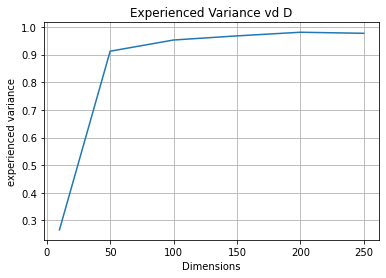

In [4]:
dims,evs = [],[]
for d in [10,50,100,150,200,250]:
    mean = np.random.rand(d)
    cov = np.eye(d)
    m = 300
    X = np.random.multivariate_normal(mean,cov, 2*m).T
    w = range(1,2*m+1)
    Yn = np.array([sum(a) for a in w*X])
    Y = np.array([np.random.normal(a,1) for a in Yn])
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5,shuffle=True)
    reg = LinearRegression().fit(X_train,Y_train)
    Y_pred = reg.predict(X_test)
    ev = explained_variance_score(Y_test, Y_pred)
    dims.append(d)
    evs.append(ev)

plt.plot(dims,evs)
plt.xlabel('Dimensions')
plt.ylabel('experienced variance')
plt.title('Experienced Variance vd D')
plt.grid(True)
plt.show()

In [5]:
Yn = np.array([sum(a) for a in w*X])

In [6]:
Y = np.array([np.random.normal(a,1) for a in Yn])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.5,shuffle=True)

In [8]:
reg = LinearRegression().fit(X_train,Y_train)

In [9]:
Y_pred = reg.predict(X_test)

In [10]:
explained_variance_score(Y_test, Y_pred)

0.974334955094191

## 2.2.4

In [11]:
A = sklearn.datasets.make_spd_matrix(n_dim=10)
b = np.random.rand(10)
c = np.random.rand()

b_test = np.transpose(b)
b_test.reshape(1,-1).shape

(1, 10)

In [12]:
A_inv = np.linalg.inv(A)
op = np.matmul(A_inv,b)
op.reshape(-1,1).shape
opt = np.transpose(op)
opt.reshape(1,-1).shape

(1, 10)

In [13]:
of = np.matmul(np.matmul(opt,A),op) - 2*np.matmul(b_test,op)+c

In [14]:
of

-10.99990397041337

In [15]:
norm_A = np.linalg.norm(A,ord=2)
norm_b = np.linalg.norm(b)

In [16]:
step_size=1/(2*norm_A+norm_b)

In [17]:
step_size

0.04361106736837822

In [18]:
v = np.array([1/10]*10)
v.reshape(-1,1).shape

(10, 1)

In [19]:
gdov = []

for n in range(1001):
    v = v-step_size*(2*np.matmul(A,v)-2*b_test)
    vt = np.transpose(v)
    vt.reshape(1,-1)
    
    ov = np.matmul(np.matmul(vt,A),v) - 2*np.matmul(b_test,v)+c
    
    gdov.append(ov)

In [20]:
v = np.array([1/10]*10)
v.reshape(-1,1).shape
step_sgd = step_size/100
sgdov = []
for n in range(100001):
    e = np.random.randn(10)
    v = v-step_sgd*(2*np.matmul(A,v)-2*b_test) + step_sgd*0.5*e
    vt = np.transpose(v)
    vt.reshape(1,-1)
    ov = np.matmul(np.matmul(vt,A),v) - 2*np.matmul(b_test,v)+c
    sgdov.append(ov)

Text(0.5, 1.0, 'Plot of Objective values GD and SGD')

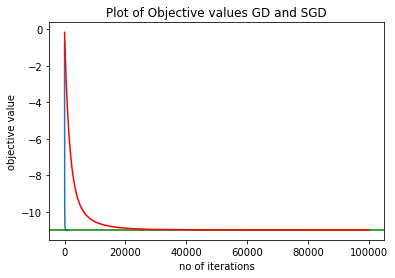

In [21]:
plt.plot(range(len(gdov)),gdov)
plt.xlabel('no of iterations')
plt.ylabel('objective value')
plt.axhline(y=of,color='g')
plt.plot(range(len(sgdov)),sgdov,color='r')
plt.title('Plot of Objective values GD and SGD')

Text(0.5, 1.0, 'Plot of Objective values SGD')

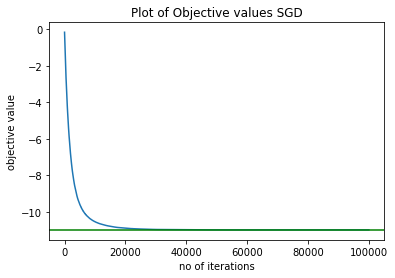

In [22]:
plt.plot(range(len(sgdov)),sgdov)
plt.xlabel('no of iterations')
plt.axhline(y=of,color='g')
plt.ylabel('objective value')
plt.title('Plot of Objective values SGD')